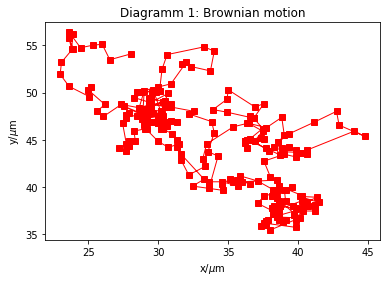

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit 

def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

t,x,y=np.loadtxt('data/Messung.dat', skiprows=1, usecols=(1,2,3),
                 converters={1:comma_to_float, 2:comma_to_float,3:comma_to_float}, unpack=True)

plt.plot(x,y, marker='s',color='r', linewidth=1)
plt.xlabel('x/'+'$\mu$'+'m')
plt.ylabel('y/'+'$\mu$'+'m')
plt.title('Diagramm 1: Brownian motion')
plt.savefig('figures/brown1.pdf', format='PDF')

In [2]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0

while i<(len(t)-1):
    dt=np.append(dt,t[1+i]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i=i+1

r_squared=dx**2+dy**2

In [3]:
r_squared_mean=round(np.mean(r_squared)*10**(-12),14)
print("Mittleres Verschiebungsquadrat =",r_squared_mean)
r_squared_mean_std=round(np.std(r_squared)/np.sqrt(len(r_squared))*10**(-12),14)
print("Standardabweichung des mittleren Verschiebungsquadrats =",r_squared_mean_std)
dt_mean=round(np.mean(dt),5)
print("Mittlere Messzeit =",dt_mean)
dt_mean_std=round(np.std(dt)/np.sqrt(len(dt)),5)
print("Mittlerer Fehler der mittleren Messzeit =",dt_mean_std)

Mittleres Verschiebungsquadrat = 1.74e-12
Standardabweichung des mittleren Verschiebungsquadrats = 1.3e-13
Mittlere Messzeit = 1.00089
Mittlerer Fehler der mittleren Messzeit = 0.00041


In [4]:
T = 294.45 #gemittelte temperatur aus verschiedenen messungen zu anderen zeiten
dT = 0.1
a = 377.5*10**(-9)
da = 15*10**(-9)
eta = 9.7*10**(-4) #viskosität wasser aus diagramm
deta = 0.04*10**(-4)
#Bestimmung der Boltzmannkonstante
k = round(6*np.pi*eta*a*r_squared_mean/(4*T*dt_mean),25)
#Bestimmung des Fehlers der Boltzmannkonstante durch Fehlerfortpflanzung
dk = round((3/2)*np.pi*((deta*a*r_squared_mean/(T*dt_mean))**2+(eta*da*r_squared_mean/(T*dt_mean))**2+(eta*a*r_squared_mean_std/(T*dt_mean))**2+(eta*a*r_squared_mean*dT/(dt_mean*T**2))**2+(eta*a*r_squared_mean*dt_mean_std/(T*dt_mean**2))**2)**0.5,25)

print("Boltzmannkonstante:\n(",k,'+/-',dk,") m^2*kg/(s^2*K)")

Boltzmannkonstante:
( 1.02e-23 +/- 9e-25 ) m^2*kg/(s^2*K)


In [8]:
#Gleichung 15 aus skript
D = round(r_squared_mean/(4*dt_mean),14)
dD = round(((r_squared_mean_std/(4*dt_mean))**2+(r_squared_mean*dt_mean_std/(4*dt_mean**2))**2)**0.5,14)
print("Diffusionskoeffizient = (", D,"+/-",dD,") m^2/s")
#Berechnung des Diffusionskoeffizienten mit Fehler durch Fehlerfortpflanzung

Diffusionskoeffizient = ( 4.3e-13 +/- 3e-14 ) m^2/s


C:\WinPython\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


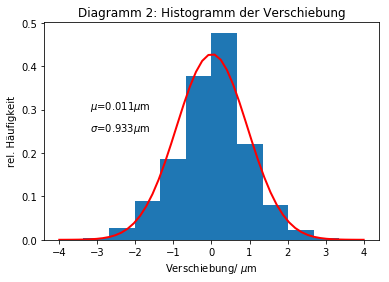

In [9]:
all_data=np.array([])
all_data=np.append(dx,dy)
plt.hist(all_data, density=1, bins=10)
mu=np.mean(all_data)
sigma=np.std(all_data)
gauss=mlab.normpdf(np.linspace(-4,4), mu, sigma)

plt.plot(np.linspace(-4,4), gauss, 'b-', color='r', linewidth=2)
plt.title('Diagramm 2: Histogramm der Verschiebung')
plt.xlabel('Verschiebung/ $\mu$'+'m')
plt.ylabel('rel. Häufigkeit')
plt.text(-3.2,0.30,'$\mu$={value:0.3f}'.format(value=mu)+ '$\mu$'+'m')
plt.text(-3.2,0.25,'$\sigma$={value:0.3f}'.format(value=sigma)+ '$\mu$'+'m')
plt.savefig('figures/brown2.pdf', format='PDF')


Steigung a = 1.832 +/- 0.009
Achsenabschnitt b = -19.6 +/- 1.2


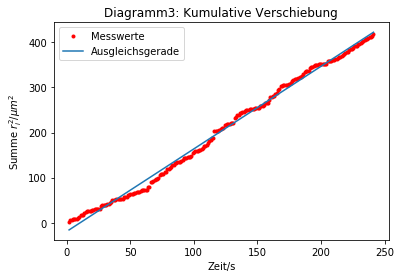

In [15]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[:-1],r_kumm,marker='.', color='red', linewidth=0)
plt.xlabel('Zeit/s')
plt.ylabel('Summe $r_i^2/\mu m^2$')
plt.title('Diagramm3: Kumulative Verschiebung')

def linear(x,a,b):
    return a*x+b


popt, pcov=curve_fit(linear, t[:-1], r_kumm)
plt.plot(t[:-1],linear(t[:-1],*popt))
plt.legend(("Messwerte","Ausgleichsgerade"),loc="upper left")
plt.savefig('figures/brown3.pdf', format='PDF')
print("Steigung a =",round(popt[0],3), "+/-", round(np.sqrt(pcov[0,0]),3))
print("Achsenabschnitt b =",round(popt[1],1), "+/-", round(np.sqrt(pcov[1,1]),1))
